# Итоговая работа по модулю "Метрики, гипотезы, точки роста"

In [3]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv('Data Sample (AIC) для итоговой работы (new) - Online Retail.csv')

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/19 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/19 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/19 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/19 9:02,"2,75",17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/20 12:31,"0,85",15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/20 12:31,"2,08",15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/20 12:31,"0,42",15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/20 12:50,"1,95",12680.0,France


In [23]:
df.describe()

,Quantity,CustomerID
count,54214.000000,40643.000000
mean,9.610802,15283.422803
std,57.358422,1707.982278
min,-9600.000000,12347.000000
25%,1.000000,13969.000000
50%,3.000000,15152.000000
75%,10.000000,16775.000000
max,2400.000000,18287.000000


In [24]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
['Номер счета-фактуры', 'Код товара', 'Описание', 'Количество', 'Дата выставления счета',
'Цена единицы измерения', 'Идентификатор клиента', 'Страна'],

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    54214 non-null  object        
 1   StockCode    54214 non-null  object        
 2   Description  54080 non-null  object        
 3   Quantity     54214 non-null  int64         
 4   InvoiceDate  54214 non-null  datetime64[ns]
 5   UnitPrice    54214 non-null  object        
 6   CustomerID   40643 non-null  float64       
 7   Country      54214 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 3.3+ MB


In [10]:
df['InvoiceDate'].min()

Timestamp('2019-12-01 08:26:00')

In [11]:
df['InvoiceDate'].max()

Timestamp('2020-12-09 12:50:00')

In [12]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description      134
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     13571
Country            0
dtype: int64

In [13]:
df[ df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
158,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2019-12-01 14:32:00,"2,51",NaN,United Kingdom
159,536544,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,2019-12-01 14:32:00,"3,36",NaN,United Kingdom
160,536544,21879,HEARTS GIFT TAPE,1,2019-12-01 14:32:00,"1,66",NaN,United Kingdom
161,536544,21928,JUMBO BAG SCANDINAVIAN PAISLEY,1,2019-12-01 14:32:00,"4,21",NaN,United Kingdom
162,536544,22069,BROWN PIRATE TREASURE CHEST,1,2019-12-01 14:32:00,"3,36",NaN,United Kingdom
...,...,...,...,...,...,...,...,...
54161,581498,48138,DOORMAT UNION FLAG,1,2020-12-09 10:26:00,"14,13",NaN,United Kingdom
54162,581498,82482,WOODEN PICTURE FRAME WHITE FINISH,4,2020-12-09 10:26:00,"4,96",NaN,United Kingdom
54163,581498,84032A,CHARLIE+LOLA PINK HOT WATER BOTTLE,4,2020-12-09 10:26:00,"5,79",NaN,United Kingdom
54164,581498,84558a,3D DOG PICTURE PLAYING CARDS,1,2020-12-09 10:26:00,"5,79",NaN,United Kingdom


In [ ]:
InvoiceNo          

In [27]:
a = df[pd.to_numeric(df['InvoiceNo'], errors='coerce').isnull()]

In [28]:
b = df[df['Quantity'] < 0]

In [30]:
c = a.merge(b, on='InvoiceNo', how='outer', indicator=True)

In [33]:
c [c['_merge'] == 'right_only']

,InvoiceNo,StockCode_x,Description_x,Quantity_x,InvoiceDate_x,UnitPrice_x,CustomerID_x,Country_x,StockCode_y,Description_y,Quantity_y,InvoiceDate_y,UnitPrice_y,CustomerID_y,Country_y,_merge
1766,536998,NaN,NaN,NaN,NaT,NaN,NaN,NaN,85067,NaN,-6,2019-12-03 15:30:00,0,NaN,United Kingdom,right_only
1767,537005,NaN,NaN,NaN,NaT,NaN,NaN,NaN,21692,NaN,-70,2019-12-03 15:35:00,0,NaN,United Kingdom,right_only
1768,537009,NaN,NaN,NaN,NaT,NaN,NaN,NaN,84534B,NaN,-80,2019-12-03 15:38:00,0,NaN,United Kingdom,right_only
1769,537018,NaN,NaN,NaN,NaT,NaN,NaN,NaN,84562A,NaN,-3,2019-12-03 15:42:00,0,NaN,United Kingdom,right_only
1770,537870,NaN,NaN,NaN,NaT,NaN,NaN,NaN,21486,NaN,-77,2019-12-08 17:08:00,0,NaN,United Kingdom,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,579732,NaN,NaN,NaN,NaT,NaN,NaN,NaN,35648,check,-10,2020-11-30 14:24:00,0,NaN,United Kingdom,right_only
1885,579743,NaN,NaN,NaN,NaT,NaN,NaN,NaN,21810,check,-135,2020-11-30 14:36:00,0,NaN,United Kingdom,right_only
1886,580359,NaN,NaN,NaN,NaT,NaN,NaN,NaN,20775,NaN,-35,2020-12-02 16:11:00,0,NaN,United Kingdom,right_only
1887,581207,NaN,NaN,NaN,NaT,NaN,NaN,NaN,21688,mixed up,-337,2020-12-07 18:34:00,0,NaN,United Kingdom,right_only


In [36]:
d = pd.DataFrame(df['Description'].value_counts())

In [40]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     243
JUMBO BAG RED RETROSPOT                222
REGENCY CAKESTAND 3 TIER               204
LUNCH BAG RED RETROSPOT                175
PACK OF 72 RETROSPOT CAKE CASES        164
                                      ... 
BLUE/YELLOW FLOWER DESIGN BIG MUG        1
PINK FLOCK PHOTO FRAME                   1
BEACH HUT MIRROR                         1
HOLLY TOP CHRISTMAS STOCKING             1
AMETHYST GLASS/SHELL/PEARL NECKLACE      1
Name: Description, Length: 3401, dtype: int64

In [42]:
d = df['Description'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [43]:
d[d['counts'] >= 100]

,unique_values,counts
0,WHITE HANGING HEART T-LIGHT HOLDER,243
1,JUMBO BAG RED RETROSPOT,222
2,REGENCY CAKESTAND 3 TIER,204
3,LUNCH BAG RED RETROSPOT,175
4,PACK OF 72 RETROSPOT CAKE CASES,164
5,PARTY BUNTING,162
6,LUNCH BAG BLACK SKULL.,149
7,JUMBO BAG PINK POLKADOT,141
8,SET OF 3 CAKE TINS PANTRY DESIGN,140
9,ASSORTED COLOUR BIRD ORNAMENT,138


In [136]:
len(df['StockCode'].unique())

3351

In [44]:
len(d)

3401

<Axes: ylabel='Frequency'>

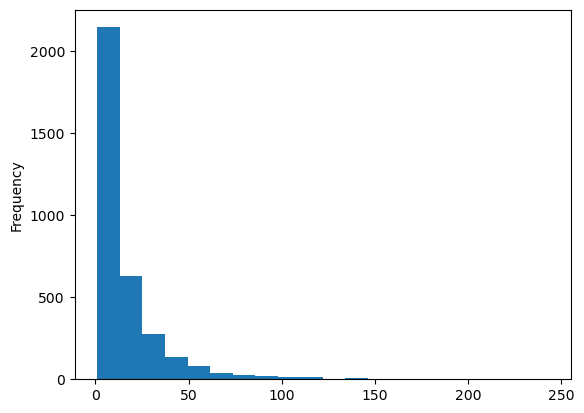

In [45]:
d['counts'].plot(kind='hist', bins=20)

In [46]:
df['Country'].unique()

array(['United Kingdom', 'Australia', 'Netherlands', 'Norway', 'EIRE',
       'Germany', 'France', 'Switzerland', 'Spain', 'Poland', 'Italy',
       'Belgium', 'Lithuania', 'Japan', 'Portugal', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Israel', 'Greece', 'Hong Kong', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Czech Republic', 'Canada', 'Unspecified',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [47]:
len(df['Country'].unique())

37

In [48]:
len(df['CustomerID'].unique())

3820

In [54]:
len(df[df.duplicated()])

50

In [55]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
920,537196,22640,SET OF 4 NAPKIN CHARMS 3 KEYS,1,2019-12-05 13:55:00,"2,55",15426.0,United Kingdom
1197,537265,22960,JAM MAKING SET WITH JARS,1,2019-12-06 11:26:00,"4,25",15919.0,United Kingdom
1229,537369,47471,RAINBOW PEGS PHOTO CLIP STRING,1,2019-12-06 12:41:00,"0,65",17860.0,United Kingdom
1289,537399,22815,CARD PSYCHEDELIC APPLES,12,2019-12-06 14:31:00,"0,42",13030.0,United Kingdom
1596,537646,22189,CREAM HEART CARD HOLDER,1,2019-12-07 15:39:00,"3,95",17591.0,United Kingdom
1597,537646,21484,CHICK GREY HOT WATER BOTTLE,1,2019-12-07 15:39:00,"3,45",17591.0,United Kingdom
1610,537653,22107,PIZZA PLATE IN BOX,1,2019-12-07 15:54:00,"3,75",17897.0,United Kingdom
1757,537781,21625,VINTAGE UNION JACK APRON,1,2019-12-08 12:46:00,"6,95",17341.0,United Kingdom
1761,537781,72799E,IVORY PILLAR CANDLE SILVER FLOCK,1,2019-12-08 12:46:00,"2,95",17341.0,United Kingdom
2600,538514,21756,BATH BUILDING BLOCK WORD,1,2019-12-12 14:27:00,"5,95",15044.0,United Kingdom


In [63]:
df[pd.to_numeric(df['UnitPrice'], errors='coerce').isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/19 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/19 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/19 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/19 9:02,"2,75",17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/20 12:31,"0,85",15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/20 12:31,"2,08",15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/20 12:31,"0,42",15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/20 12:50,"1,95",12680.0,France


In [64]:
df['UnitPrice'] = df['UnitPrice'].apply( lambda x: x.replace(',', '.'))

In [66]:
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  float64
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.3+ MB


In [72]:
df['value'] = df['Quantity'] * df['UnitPrice']

In [73]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,value
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/19 8:34,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/19 8:34,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/19 8:34,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/19 9:02,2.75,17850.0,United Kingdom,22.00
...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/20 12:31,0.85,15804.0,United Kingdom,20.40
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/20 12:31,2.08,15804.0,United Kingdom,24.96
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/20 12:31,0.42,15804.0,United Kingdom,10.50
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/20 12:50,1.95,12680.0,France,23.40


In [100]:
e = df.groupby(['Description']).agg({'value': ['sum']}).sort_values()

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [91]:
e = e.reset_index(drop=True)

In [95]:
e

,Description,value
,,sum
0,4 PURPLE FLOCK DINNER CANDLES,55.10
1,50'S CHRISTMAS GIFT BAG LARGE,192.38
2,DOLLY GIRL BEAKER,563.09
3,I LOVE LONDON MINI BACKPACK,161.83
4,I LOVE LONDON MINI RUCKSACK,4.15
...,...,...
3396,wet/rusty,0.00
3397,wrong barcode (22467),0.00
3398,wrong code?,0.00


In [98]:
e.sort_values(['Description','sum']).groupby('Description')

KeyError: 'sum'

In [102]:
df.sort_values(['value', 'Description']).groupby(['Description']).agg({'value': ['sum']})

,value
,sum
Description,
4 PURPLE FLOCK DINNER CANDLES,55.10
50'S CHRISTMAS GIFT BAG LARGE,192.38
DOLLY GIRL BEAKER,563.09
I LOVE LONDON MINI BACKPACK,161.83
I LOVE LONDON MINI RUCKSACK,4.15
...,...
wet/rusty,0.00
wrong barcode (22467),0.00


In [117]:
e.sort_values([('value', 'sum')], ascending=False)

,Description,value
,,sum
898,DOTCOM POSTAGE,20607.25
2382,REGENCY CAKESTAND 3 TIER,16219.40
1526,JUMBO BAG RED RETROSPOT,10060.83
3225,WHITE HANGING HEART T-LIGHT HOLDER,9597.67
195,ASSORTED COLOUR BIRD ORNAMENT,6946.86
...,...,...
2598,SET OF 3 BABUSHKA STACKING TINS,-1168.20
1464,IVORY DINER WALL CLOCK,-1586.84
1993,PANTRY CHOPPING BOARD,-2801.33


In [105]:
e.columns

MultiIndex([('Description',    ''),
            (      'value', 'sum')],
           )

In [110]:
e

,Description,value
,,sum
0,4 PURPLE FLOCK DINNER CANDLES,55.10
1,50'S CHRISTMAS GIFT BAG LARGE,192.38
2,DOLLY GIRL BEAKER,563.09
3,I LOVE LONDON MINI BACKPACK,161.83
4,I LOVE LONDON MINI RUCKSACK,4.15
...,...,...
3396,wet/rusty,0.00
3397,wrong barcode (22467),0.00
3398,wrong code?,0.00


In [121]:
df.groupby(['Description']).agg({'Quantity': ['sum']}).reset_index().sort_values([('Quantity', 'sum')], ascending=False)

,Description,Quantity
,,sum
1526,JUMBO BAG RED RETROSPOT,5114
1970,PACK OF 72 RETROSPOT CAKE CASES,5098
195,ASSORTED COLOUR BIRD ORNAMENT,4430
3299,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4228
2300,RED HARMONICA IN BOX,3834
...,...,...
110,??,-635
2110,PINK BLUE FELT CRAFT TRINKET BOX,-653
109,?,-723


In [133]:
df[ df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,value
204,536553,37461,NaN,3,12/1/19 14:35,0.0,NaN,United Kingdom,0.0
730,536995,35951,NaN,57,12/3/19 15:29,0.0,NaN,United Kingdom,0.0
731,536998,85067,NaN,-6,12/3/19 15:30,0.0,NaN,United Kingdom,-0.0
732,537005,21692,NaN,-70,12/3/19 15:35,0.0,NaN,United Kingdom,-0.0
733,537009,84534B,NaN,-80,12/3/19 15:38,0.0,NaN,United Kingdom,-0.0
...,...,...,...,...,...,...,...,...,...
48602,577608,35400,NaN,5,11/21/20 9:22,0.0,NaN,United Kingdom,0.0
49770,578360,84971L,NaN,2,11/24/20 10:36,0.0,NaN,United Kingdom,0.0
50021,578693,21811,NaN,1,11/25/20 9:38,0.0,NaN,United Kingdom,0.0
52171,580359,20775,NaN,-35,12/2/20 16:11,0.0,NaN,United Kingdom,-0.0


In [79]:
df[ df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,value
204,536553,37461,NaN,3,12/1/19 14:35,0.0,NaN,United Kingdom,0.0
730,536995,35951,NaN,57,12/3/19 15:29,0.0,NaN,United Kingdom,0.0
731,536998,85067,NaN,-6,12/3/19 15:30,0.0,NaN,United Kingdom,-0.0
732,537005,21692,NaN,-70,12/3/19 15:35,0.0,NaN,United Kingdom,-0.0
733,537009,84534B,NaN,-80,12/3/19 15:38,0.0,NaN,United Kingdom,-0.0
...,...,...,...,...,...,...,...,...,...
51508,579743,21810,check,-135,11/30/20 14:36,0.0,NaN,United Kingdom,-0.0
52171,580359,20775,NaN,-35,12/2/20 16:11,0.0,NaN,United Kingdom,-0.0
53536,581207,21688,mixed up,-337,12/7/20 18:34,0.0,NaN,United Kingdom,-0.0
53537,581209,21620,NaN,6,12/7/20 18:35,0.0,NaN,United Kingdom,0.0


In [82]:
df[ df['Quantity'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,value


In [16]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2019-12-01 08:34:00,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2019-12-01 08:34:00,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 09:02:00,"2,75",17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,2020-12-09 12:31:00,"0,85",15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,2020-12-09 12:31:00,"2,08",15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2020-12-09 12:31:00,"0,42",15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,2020-12-09 12:50:00,"1,95",12680.0,France


In [17]:
pd.to_numeric(df['InvoiceNo'])

ValueError: Unable to parse string "C536383" at position 19

In [26]:
import datetime

In [27]:
date_time_str = '12/9/20 12:31'

In [28]:
date_time_obj = datetime.datetime.strptime(date_time_str, '%d/%m/%y %H:%M')

In [29]:
date_time_obj

datetime.datetime(2020, 9, 12, 12, 31)

In [31]:
df[['InvoiceDate']] = df[[0]].apply( lambda x: datetime.datetime.strptime(x, '%d/%m/%y %H:%M') ) 

KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

In [143]:
df[ df['StockCode'].str.contains('84029E')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,value
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,3.39,17850.0,United Kingdom,20.34
236,536576,84029E,RED WOOLLY HOTTIE WHITE HEART.,96,12/1/19 16:11,2.95,13777.0,United Kingdom,283.20
311,536600,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/2/19 8:32,3.39,17850.0,United Kingdom,20.34
345,536630,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/2/19 10:56,3.39,17850.0,United Kingdom,20.34
1252,537382,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,12/6/19 13:13,3.75,16710.0,United Kingdom,7.50
1373,537434,84029E,RED WOOLLY HOTTIE WHITE HEART.,1,12/6/19 16:57,7.62,NaN,United Kingdom,7.62
1469,537620,84029E,RED WOOLLY HOTTIE WHITE HEART.,8,12/7/19 14:00,3.75,13880.0,United Kingdom,30.00
1908,537865,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,12/8/19 16:34,3.75,16011.0,United Kingdom,7.50
1914,537867,84029E,RED WOOLLY HOTTIE WHITE HEART.,4,12/8/19 16:48,3.75,16717.0,United Kingdom,15.00
2194,538163,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,12/9/19 17:27,3.75,17841.0,United Kingdom,7.50


In [140]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,value
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/19 8:34,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/19 8:34,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/19 8:34,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/19 9:02,2.75,17850.0,United Kingdom,22.00
...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/20 12:31,0.85,15804.0,United Kingdom,20.40
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/20 12:31,2.08,15804.0,United Kingdom,24.96
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/20 12:31,0.42,15804.0,United Kingdom,10.50
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/20 12:50,1.95,12680.0,France,23.40
